# SentimentAnalysis of GooglePlayStore

## 1.Business Problem

## 1.1 Description

### Description

GooglePlayStore data

## 1.2 Sources

https://www.kaggle.com/lava18/google-play-store-apps/home

## 2.Machine Learning Problem

### 2.1 Data

### 2.1.1 Data Overviews

total rows=64295  <br>
Features=5 <br>


### Attribute information
<ul>
<li><b>App</b>- Application name</li>
<li><b>Translated_Review</b>- User review (Preprocessed and translated to English)</li>
<li><b>Sentiment</b>-Positive/Negative/Neutral (Preprocessed)</li>
<li><b>Sentiment_Polarity</b>- Sentiment polarity score</li>
<li><b>Sentiment_Subjectivity</b>- Sentiment subjectivity score</li>
<ul>

## 2.2 Mapping the real-world problem to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem

Sentiment anaylsis on GooglePlayStore data

## 3.1 Data Loading

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 17.9MB/s 


In [0]:
download = drive.CreateFile({'id': '1HH2DkdaRltCZP8HjSHMP2kKP0Jfn_aV1'})
download.GetContentFile('Preprocess.csv')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
#NB
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [0]:
df=pd.read_csv("user_reviews.csv")
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


## 3.2 Data Preprocessing

In [0]:
#total no of Apps before cleaning
print(df.shape)
#Checking null value
print(df.isnull().values.any())

(64295, 5)
True


In [0]:
df=df.drop(['Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=1)

In [0]:
#dropping the rows which has null value 
final = df.dropna(how='any',axis=0) 

In [0]:
#printing shape after removing the rows which has null values
print(final.shape)
print(final.isnull().values.any())

(37427, 3)
False


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


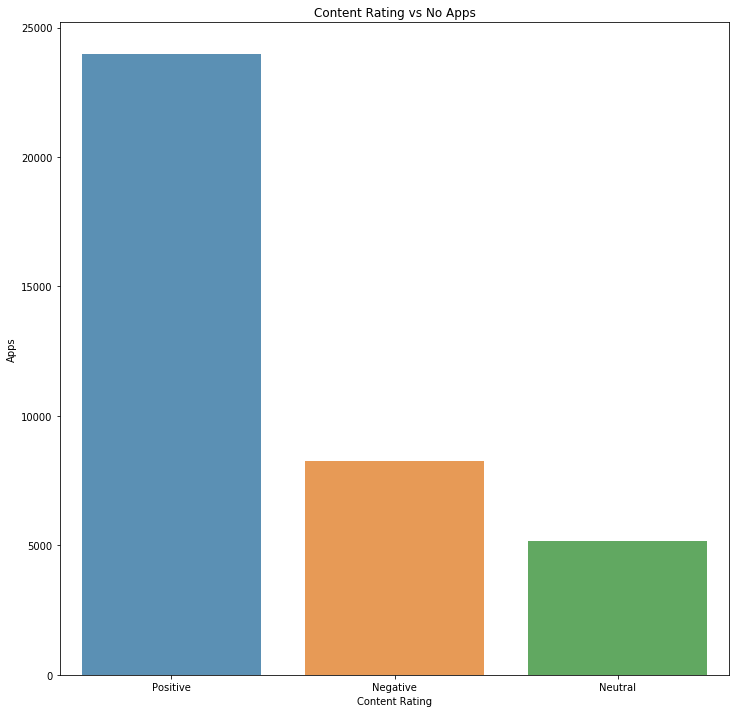

In [0]:
Sentiment=final['Sentiment'].value_counts()
print(Sentiment)
plt.figure(figsize=(12,12))
sns.barplot(Sentiment.index, Sentiment.values, alpha=0.8)
plt.title('Content Rating vs No Apps')
plt.ylabel('Apps')
plt.xlabel('Content Rating')
plt.show()

In [0]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Translated_Review'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

10319
Need update categories blood pressure based current guidelines. Example 2017 Clinical practice guidelines (orig published Nov 2017) ACC/AHA recommend normal BP as: SBP <120; DBP <80. Stage 2 HTN= SBP >/= 140; DBP >/= 90. Refer table 6 journal article. Otherwise, really love nice graphics.


In [0]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [0]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
all_netural_words=[]
s=''
for sent in final['Translated_Review'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Sentiment'].values)[i] == 'Positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Sentiment'].values)[i] == 'Negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                    if(final['Sentiment'].values)[i] == 'Negative':
                        all_netural_words.append(s) #list of all words used to describe negative reviews reviews    
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

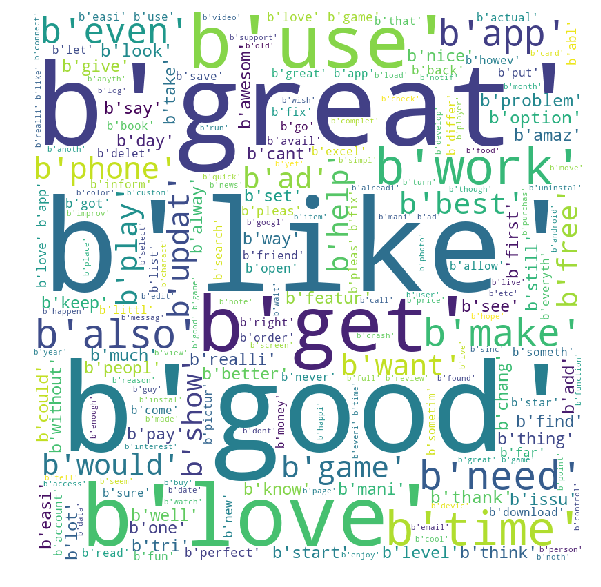

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(all_positive_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

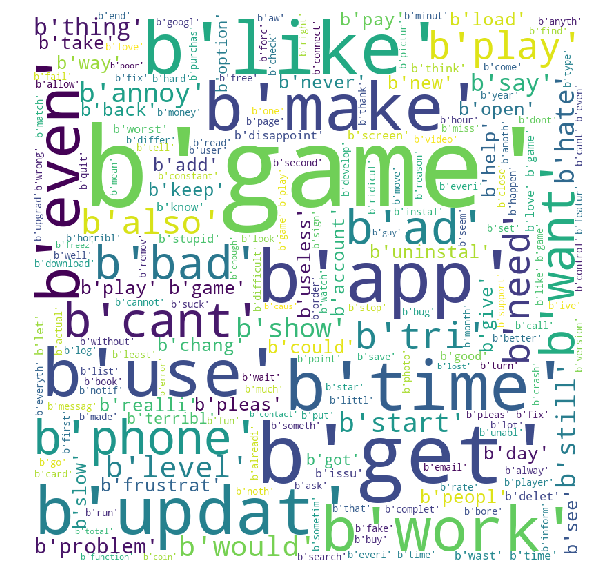

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(all_negative_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

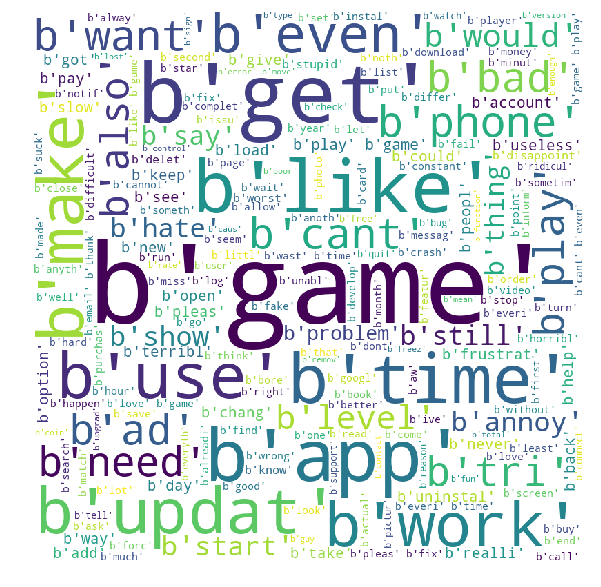

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(all_netural_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [0]:
final.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


In [0]:
final=pd.read_csv("Preprocess.csv")

In [0]:
from sklearn.model_selection import train_test_split
x=final["Translated_Review"]
y=final["Sentiment"]
x_tr,x_test,y_tr,y_test=train_test_split(x, y, test_size=0.2,shuffle=False)

In [73]:
print(x_tr.shape,x_test.shape,y_tr.shape,y_test.shape)

(29941,) (7486,) (29941,) (7486,)


# 4.Bag of Words (BoW)

## 4.1 Unigram

In [0]:
#BOW for unigram
bow = CountVectorizer()
x_tr_uni = bow.fit_transform(x_tr)
x_test_uni= bow.transform(x_test)

## 4.2 Bi-Grams


In [0]:
bi_gram = CountVectorizer(ngram_range=(1,2))
x_tr_bi = bi_gram.fit_transform(x_tr)
x_test_bi = bi_gram.transform(x_test)

# 5 TF-IDF

In [0]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_tr_tfidf = tf_idf_vect.fit_transform(x_tr)
x_test_tfidf = tf_idf_vect.transform(x_test)

## Machine learning models


## 6. NAIVE BAYES

### 6.1 Unigram

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   10.2s finished


Best HyperParameter:  {'alpha': 1}
0.7533816505794729


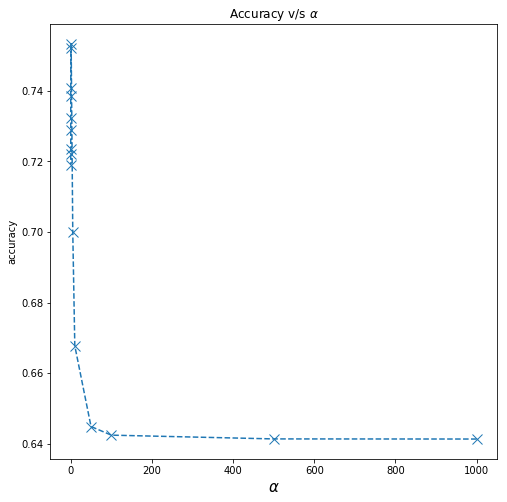

In [11]:
NB = MultinomialNB()
alpha=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
alpha_value = {'alpha':alpha} #params we need to try on classifier
gsv = GridSearchCV(NB,alpha_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_uni,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['alpha']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("F1-Score")
plt.title(r'F1-Score v/s $\alpha$')
plt.plot(alpha,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 75.234%
Precision on test set: 0.748
Recall on test set: 0.752
F1-Score on test set: 0.726


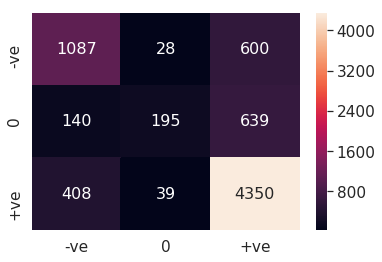

In [24]:
NB = MultinomialNB(1)
NB.fit(x_tr_uni,y_tr)
y_pred = NB.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='weighted')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### 6.2 Bi-Gram

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.2s finished


Best HyperParameter:  {'alpha': 1}
0.7300023379312648


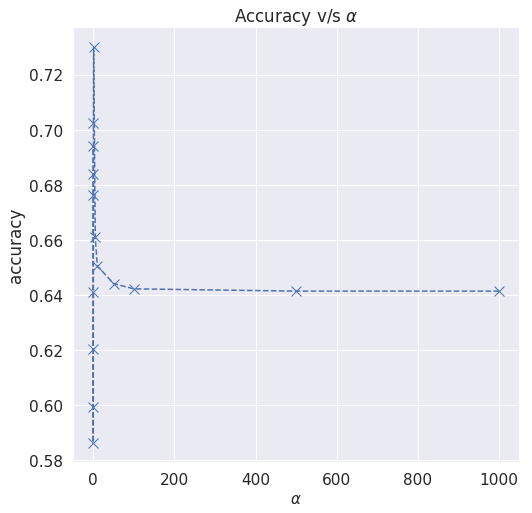

In [25]:
NB = MultinomialNB()
alpha=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
alpha_value = {'alpha':alpha} #params we need to try on classifier
gsv = GridSearchCV(NB,alpha_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_bi,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['alpha']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("F1-Score")
plt.title(r'F1-Score v/s $\alpha$')
plt.plot(alpha,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 70.064%
Precision on test set: 0.749
Recall on test set: 0.701
F1-Score on test set: 0.624


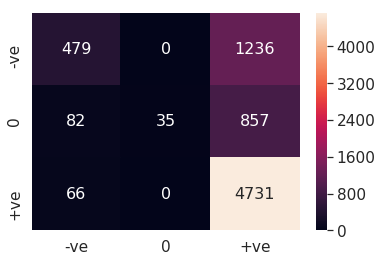

In [26]:
NB = MultinomialNB(1)
NB.fit(x_tr_bi,y_tr)
y_pred = NB.predict(x_test_bi)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='weighted')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### 6.3 TF-IDF

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.1s finished


Best HyperParameter:  {'alpha': 0.1}
0.7121338632644201


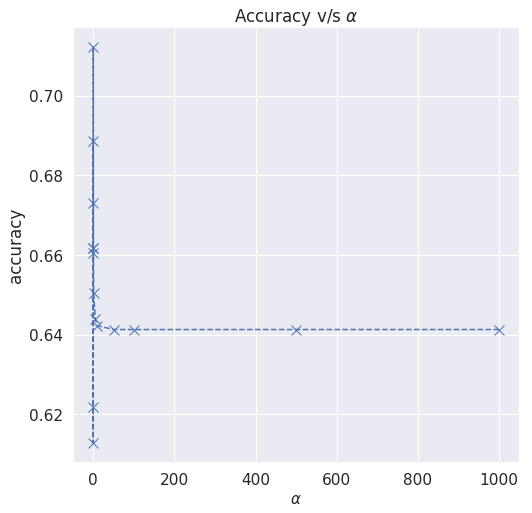

In [27]:
NB = MultinomialNB()
alpha=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
alpha_value = {'alpha':alpha} #params we need to try on classifier
gsv = GridSearchCV(NB,alpha_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_tfidf,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['alpha']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel("F1-Score")
plt.title(r'F1-Score v/s $\alpha$')
plt.plot(alpha,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 70.211%
Precision on test set: 0.733
Recall on test set: 0.702
F1-Score on test set: 0.632


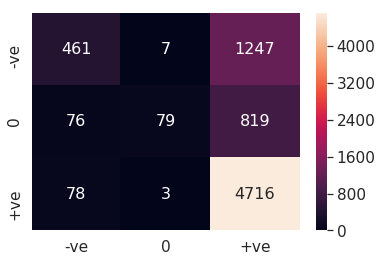

In [29]:
NB = MultinomialNB(0.1)
NB.fit(x_tr_tfidf,y_tr)
y_pred = NB.predict(x_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='weighted')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

## 7. Logistic Regression

### 7.1 Uni-gram

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.7s finished


Best HyperParameter:  {'C': 1}
0.9254533916702848


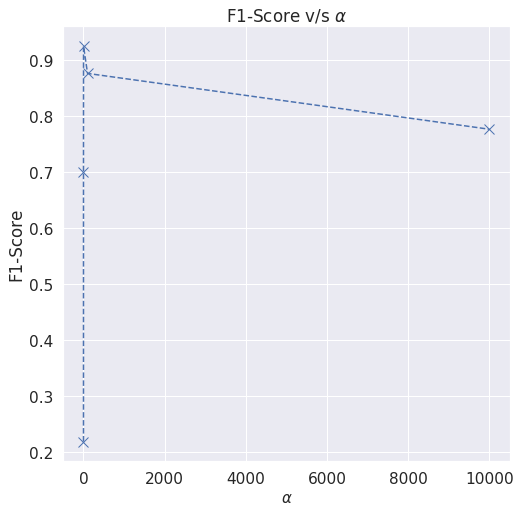

In [36]:
LR = LogisticRegression(penalty='l1')
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
C_value = [{'C': C}]

gsv = GridSearchCV(LR,C_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_uni,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel(r"$\F1-Score$",fontsize=15)
plt.ylabel("F1-Score")
plt.title(r'F1-Score v/s $\alpha$')
plt.plot(C,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 92.893%
Precision on test set: 0.908
Recall on test set: 0.915
F1-Score on test set: 0.911


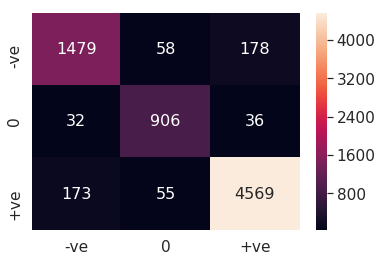

In [38]:
LR= LogisticRegression(penalty='l1',C=1)
LR.fit(x_tr_uni,y_tr)
y_pred =LR.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### 7.2 Bi-Gram

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.3min finished


Best HyperParameter:  {'C': 100}
0.9318326041214389


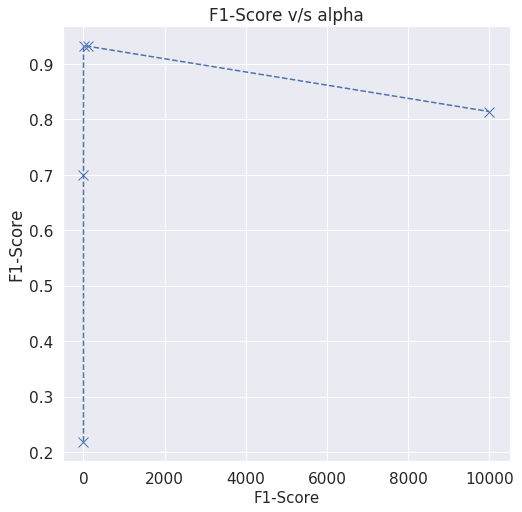

In [42]:
LR = LogisticRegression(penalty='l1')
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
C_value = [{'C': C}]

gsv = GridSearchCV(LR,C_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_bi,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel("F1-Score",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s alpha')
plt.plot(C,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 93.521%
Precision on test set: 0.917
Recall on test set: 0.922
F1-Score on test set: 0.919


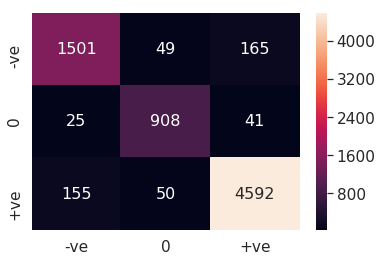

In [43]:
LR= LogisticRegression(penalty='l1',C=100)
LR.fit(x_tr_bi,y_tr)
y_pred =LR.predict(x_test_bi)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### 7.3 TF-IDF

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min finished


Best HyperParameter:  {'C': 100}
0.9329013726996427


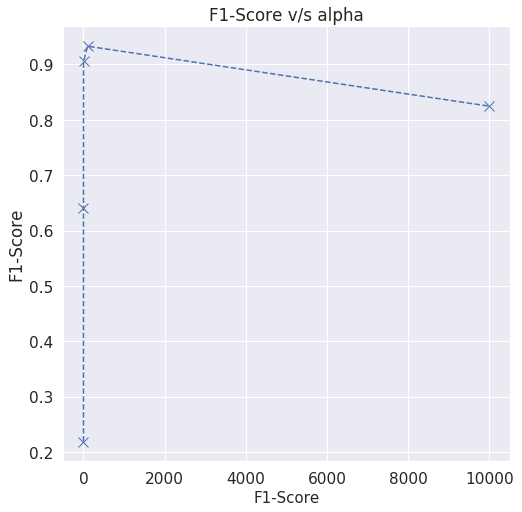

In [44]:
LR = LogisticRegression(penalty='l1')
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
C_value = [{'C': C}]

gsv = GridSearchCV(LR,C_value,cv=5,verbose=1,scoring='f1_micro')
gsv.fit(x_tr_tfidf,y_tr)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)
plt.xlabel("F1-Score",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s alpha')
plt.plot(C,x,linestyle='dashed', marker='x', markerfacecolor='red', markersize=10)
plt.show()

Accuracy on test set: 93.388%
Precision on test set: 0.923
Recall on test set: 0.908
F1-Score on test set: 0.915


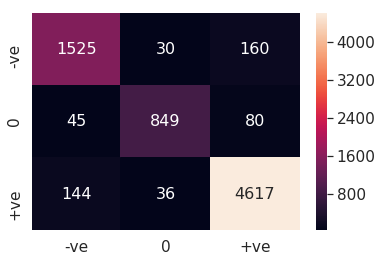

In [45]:
LR= LogisticRegression(penalty='l1',C=100)
LR.fit(x_tr_tfidf,y_tr)
y_pred =LR.predict(x_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)

### 8.Linear SVM

### 8.1 Unigram

0.8978834905355713
0.0001


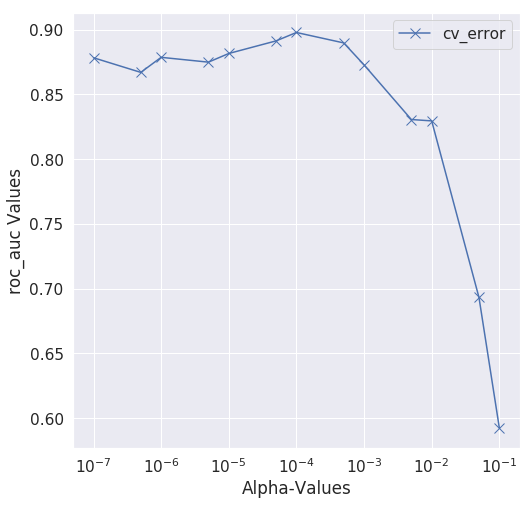

In [54]:
cv_f1score = []
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
for a in a_val:
    clf = SGDClassifier(loss = 'hinge', alpha = a, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
    clf.fit(x_tr_uni,y_tr)
    pred = clf.predict(x_cv_uni)
    score = f1_score(y_cv, pred,average='weighted')
    cv_f1score.append(score)
    
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
plt.figure(figsize=(8,8))
plt.plot(a_val, cv_f1score,label = 'cv_error', color = 'b', marker='x', markersize=10)
plt.xscale('log')
plt.xlabel('Alpha-Values')
plt.ylabel('roc_auc Values')
plt.legend()
print(max(cv_f1score))
print(a_val[cv_f1score.index(max(cv_f1score))])

Accuracy on test set: 89.861%
Precision on test set: 0.862
Recall on test set: 0.879
F1-Score on test set: 0.869


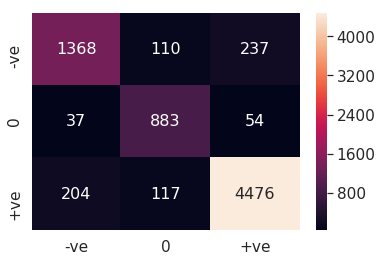

In [63]:
clf = SGDClassifier(loss = 'hinge', alpha = 0.0001, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
clf.fit(x_tr_uni,y_tr)
y_pred = clf.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=labels, yticklabels=labels)

### 8.2 Bi-Gram

0.895946303653364
5e-05


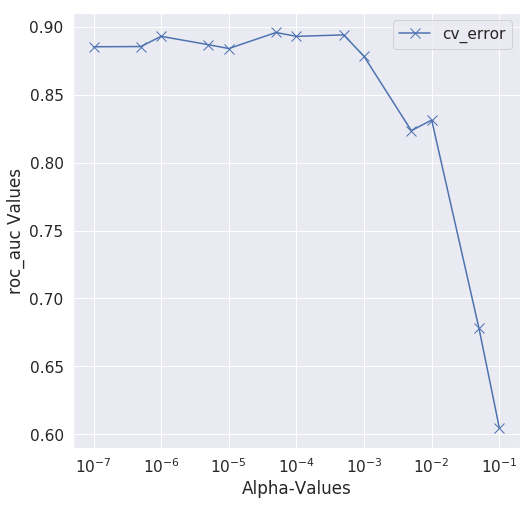

In [69]:
cv_f1score = []
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
for a in a_val:
    clf = SGDClassifier(loss = 'hinge', alpha = a, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
    clf.fit(x_tr_bi,y_tr)
    pred = clf.predict(x_cv_bi)
    score = f1_score(y_cv, pred,average='weighted')
    cv_f1score.append(score)
    
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
plt.figure(figsize=(8,8))
plt.plot(a_val, cv_f1score,label = 'cv_error', color = 'b', marker='x', markersize=10)
plt.xscale('log')
plt.xlabel('Alpha-Values')
plt.ylabel('roc_auc Values')
plt.legend()
print(max(cv_f1score))
print(a_val[cv_f1score.index(max(cv_f1score))])

Accuracy on test set: 88.792%
Precision on test set: 0.848
Recall on test set: 0.868
F1-Score on test set: 0.858


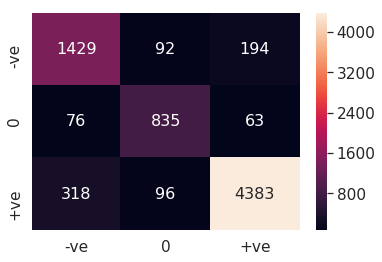

In [77]:
clf = SGDClassifier(loss = 'hinge', alpha = 0.00005, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
clf.fit(x_tr_uni,y_tr)
y_pred = clf.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=labels, yticklabels=labels)

### 8.3 TF-IDF

0.8823481681418275
5e-05


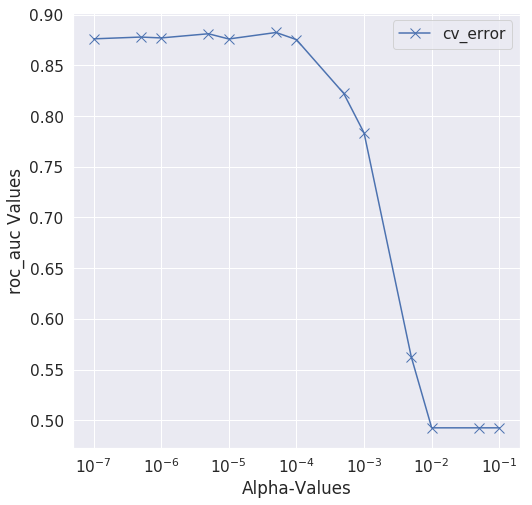

In [71]:
cv_f1score = []
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
for a in a_val:
    clf = SGDClassifier(loss = 'hinge', alpha = a, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
    clf.fit(x_tr_tfidf,y_tr)
    pred = clf.predict(x_cv_tfidf)
    score = f1_score(y_cv, pred,average='weighted')
    cv_f1score.append(score)
    
a_val = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
plt.figure(figsize=(8,8))
plt.plot(a_val, cv_f1score,label = 'cv_error', color = 'b', marker='x', markersize=10)
plt.xscale('log')
plt.xlabel('Alpha-Values')
plt.ylabel('roc_auc Values')
plt.legend()
print(max(cv_f1score))
print(a_val[cv_f1score.index(max(cv_f1score))])

Accuracy on test set: 88.298%
Precision on test set: 0.848
Recall on test set: 0.843
F1-Score on test set: 0.846


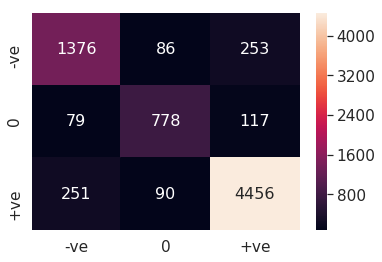

In [81]:
clf = SGDClassifier(loss = 'hinge', alpha = 0.00005, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
clf.fit(x_tr_tfidf,y_tr)
y_pred = clf.predict(x_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
labels = ['-ve','0','+ve']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=labels, yticklabels=labels)

## 9.Final Conclusion

<b>1.Naive Bayes</b>

|Model |hyper parameter|F1-score cv|Accuracy cv|F1-score test|Accuracy Test|
|------|------|------|------|------|------|
|uni-gram|1| 0.755|0.726|75.234%|
|bi-gram |1| 0.730|0.624|70.064%|
| TF-IDF|0.01| 0.7121|0.632|70.211%|

<b>2.Logistic Regression</b>

|Model|hyper parameter|F1-score cv|Accuracy cv|F1-score test|Accuracy Test|
|------|------|------|------|------|------|
|uni-gram|1| 0.925|0.911|92.893%|
|bi-gram |100| 0.931|0.919|93.521%|
| TF-IDF|100| 0.932|0.915|93.388%|

<b>3.Linear SVM</b>

|Model |hyper parameter|F1-score cv|F1-score test|Accuracy Test|
|------|------|------|------|------|------|
|unigram|0.0001| 0.897|0.869|89.861%|
|bi-gram|0.00005| 0.895|0.858|88.792%|
| TF-IDF |0.00005| 0.882|0.846|88.298%|
